In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.ion()

In [2]:
# from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.decomposition import PCA
# from sklearn.pipeline import Pipeline

In [3]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import cluster
import sys
import numpy as np
import csv

path_to_mitie_lib = '/opt/anaconda/anaconda3/lib/python3.6/site-packages/mitie'
path_to_ner_model = '/home/somnus/MITIE-master/MITIE-models/english/ner_model.dat'

sys.path.append(path_to_mitie_lib)

from mitie import *

In [4]:
# total number of articles to process
N = 50

# in memory stores for the topics, titles and contents of the news stories
# topics_array = []
titles_array = []
corpus = []

In [5]:
for i in range(0, N):

    # get the contents of the article
    # art = '/home/somnus/data_sets/articles/article-' + str(i) + '.txt'
    x = str(i)
    with open('/home/somnus/data_sets/articles_1/article-' + x + '.txt', 'r') as myfile:
        d1 = myfile.read().replace('\n', '')

        d1 = d1.lower()
        corpus.append(d1)

    # get the title of the article
    # titl = '/home/somnus/data_sets/articles/title-' + str(i) + '.txt'
    with open('/home/somnus/data_sets/articles_1/title-' + x + '.txt', 'r') as myfile:
        ti1 = myfile.read().replace('\n', '')
        ti1 = ti1.lower()
        titles_array.append(ti1)

    # get the original topic of the article
    # top = '/home/somnus/data_sets/articles/topic-' + str(i) + '.txt'
    '''with open('topic-' + str(i) + '.txt', 'r') as myfile:
        to1 = myfile.read().replace('\n', '')
        to1 = to1.lower()
        topics_array.append(to1)
        '''

In [6]:
# entity subset array
entity_text_array = []

ner = named_entity_extractor(path_to_ner_model)

for i in range(0, N):

    # Load the article contents text file and convert it into a list of words.
    # tokens = tokenize(corpus[i])
    tokens = tokenize(load_entire_file('/home/somnus/data_sets/articles_1/article-' + str(i) + '.txt'))


    # extract all entities known to the ner model mentioned in this article
    entities = ner.extract_entities(tokens)

    # extract the actual entity words and append to the array
    for e in entities:
        range_array = e[0]
        tag = e[1]
        score = e[2]
        score_text = "{:0.3f}".format(score)
        # entity_text = " ".join(tokens[j] for j in range_array)
        entity_text = " ".join(tokens[i].decode() for i in range_array)
        entity_text_array.append(entity_text.lower())
        
# remove duplicate entities detected
entity_text_array = np.unique(entity_text_array)

In [7]:
vect = TfidfVectorizer(sublinear_tf=True,
                       max_df=0.5,
                       analyzer='word',
                       stop_words='english',
                       vocabulary=entity_text_array)

# corpus_tf_idf = vect.fit_transform(corpus)

X = vect.fit_transform(corpus).todense()

In [8]:
TfidfVectorizer??

Init signature: TfidfVectorizer(input='content', encoding='utf-8', decode_error='strict', strip_accents=None, lowercase=True, preprocessor=None, tokenizer=None, analyzer='word', stop_words=None, token_pattern='(?u)\\b\\w\\w+\\b', ngram_range=(1, 1), max_df=1.0, min_df=1, max_features=None, vocabulary=None, binary=False, dtype=<class 'numpy.int64'>, norm='l2', use_idf=True, smooth_idf=True, sublinear_tf=False)
Source:        
class TfidfVectorizer(CountVectorizer):
    """Convert a collection of raw documents to a matrix of TF-IDF features.

    Equivalent to CountVectorizer followed by TfidfTransformer.

    Read more in the :ref:`User Guide <text_feature_extraction>`.

    Parameters
    ----------
    input : string {'filename', 'file', 'content'}
        If 'filename', the sequence passed as an argument to fit is
        expected to be a list of filenames that need reading to fetch
        the raw content to analyze.

        If 'file', the sequence items must have a 'read' method (

In [8]:
pca = PCA(n_components=2).fit(X)
data2D = pca.transform(X)


In [9]:
# change n_clusters to equal the number of clusters desired
n_clusters = 5
# n_components = n_clusters

# spectral clustering
spectral = cluster.SpectralClustering(n_clusters=n_clusters,
                                      eigen_solver='arpack',
                                      affinity="nearest_neighbors",
                                      n_neighbors=10)

spectral.fit(data2D)

SpectralClustering(affinity='nearest_neighbors', assign_labels='kmeans',
          coef0=1, degree=3, eigen_solver='arpack', eigen_tol=0.0,
          gamma=1.0, kernel_params=None, n_clusters=5, n_init=10, n_jobs=1,
          n_neighbors=10, random_state=None)

In [13]:
cluster.SpectralClustering??

Init signature: cluster.SpectralClustering(n_clusters=8, eigen_solver=None, random_state=None, n_init=10, gamma=1.0, affinity='rbf', n_neighbors=10, eigen_tol=0.0, assign_labels='kmeans', degree=3, coef0=1, kernel_params=None, n_jobs=1)
Source:        
class SpectralClustering(BaseEstimator, ClusterMixin):
    """Apply clustering to a projection to the normalized laplacian.

    In practice Spectral Clustering is very useful when the structure of
    the individual clusters is highly non-convex or more generally when
    a measure of the center and spread of the cluster is not a suitable
    description of the complete cluster. For instance when clusters are
    nested circles on the 2D plan.

    If affinity is the adjacency matrix of a graph, this method can be
    used to find normalized graph cuts.

    When calling ``fit``, an affinity matrix is constructed using either
    kernel function such the Gaussian (aka RBF) kernel of the euclidean
    distanced ``d(X, X)``::

           

In [19]:
from sklearn.metrics.pairwise import pairwise_kernels

In [20]:
pairwise_kernels??

Signature: pairwise_kernels(X, Y=None, metric='linear', filter_params=False, n_jobs=1, **kwds)
Source:   
def pairwise_kernels(X, Y=None, metric="linear", filter_params=False,
                     n_jobs=1, **kwds):
    """Compute the kernel between arrays X and optional array Y.

    This method takes either a vector array or a kernel matrix, and returns
    a kernel matrix. If the input is a vector array, the kernels are
    computed. If the input is a kernel matrix, it is returned instead.

    This method provides a safe way to take a kernel matrix as input, while
    preserving compatibility with many other algorithms that take a vector
    array.

    If Y is given (default is None), then the returned matrix is the pairwise
    kernel between the arrays from both X and Y.

    Valid values for metric are::
        ['rbf', 'sigmoid', 'polynomial', 'poly', 'linear', 'cosine']

    Read more in the :ref:`User Guide <metrics>`.

    Parameters
    ----------
    X : array [n_samples_

In [16]:
spectral.fit??

Signature: spectral.fit(X, y=None)
Source:   
    def fit(self, X, y=None):
        """Creates an affinity matrix for X using the selected affinity,
        then applies spectral clustering to this affinity matrix.

        Parameters
        ----------
        X : array-like or sparse matrix, shape (n_samples, n_features)
            OR, if affinity==`precomputed`, a precomputed affinity
            matrix of shape (n_samples, n_samples)

        y : Ignored

        """
        X = check_array(X, accept_sparse=['csr', 'csc', 'coo'],
                        dtype=np.float64)
        if X.shape[0] == X.shape[1] and self.affinity != "precomputed":
            warnings.warn("The spectral clustering API has changed. ``fit``"
                          "now constructs an affinity matrix from data. To use"
                          " a custom affinity matrix, "
                          "set ``affinity=precomputed``.")

        if self.affinity == 'nearest_neighbors':
            connectivit

In [21]:
from sklearn.utils import validation

In [1]:
from sklearn.metrics.pairwise import pairwise_kernels
pairwise_kernels??

Signature: pairwise_kernels(X, Y=None, metric='linear', filter_params=False, n_jobs=1, **kwds)
Source:   
def pairwise_kernels(X, Y=None, metric="linear", filter_params=False,
                     n_jobs=1, **kwds):
    """Compute the kernel between arrays X and optional array Y.

    This method takes either a vector array or a kernel matrix, and returns
    a kernel matrix. If the input is a vector array, the kernels are
    computed. If the input is a kernel matrix, it is returned instead.

    This method provides a safe way to take a kernel matrix as input, while
    preserving compatibility with many other algorithms that take a vector
    array.

    If Y is given (default is None), then the returned matrix is the pairwise
    kernel between the arrays from both X and Y.

    Valid values for metric are::
        ['rbf', 'sigmoid', 'polynomial', 'poly', 'linear', 'cosine']

    Read more in the :ref:`User Guide <metrics>`.

    Parameters
    ----------
    X : array [n_samples_

In [22]:
validation._assert_all_finite??

Signature: validation._assert_all_finite(X)
Source:   
def _assert_all_finite(X):
    """Like assert_all_finite, but only for ndarray."""
    if _get_config()['assume_finite']:
        return
    X = np.asanyarray(X)
    # First try an O(n) time, O(1) space solution for the common case that
    # everything is finite; fall back to O(n) space np.isfinite to prevent
    # false positives from overflow in sum method.
    if (X.dtype.char in np.typecodes['AllFloat'] and not np.isfinite(X.sum())
            and not np.isfinite(X).all()):
        raise ValueError("Input contains NaN, infinity"
                         " or a value too large for %r." % X.dtype)
File:      /opt/anaconda/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py
Type:      function


In [ ]:
cluster.spectral.kneighbors_graph??

In [17]:
cluster.spectral_clustering??

Signature: cluster.spectral_clustering(affinity, n_clusters=8, n_components=None, eigen_solver=None, random_state=None, n_init=10, eigen_tol=0.0, assign_labels='kmeans')
Source:   
def spectral_clustering(affinity, n_clusters=8, n_components=None,
                        eigen_solver=None, random_state=None, n_init=10,
                        eigen_tol=0.0, assign_labels='kmeans'):
    """Apply clustering to a projection to the normalized laplacian.

    In practice Spectral Clustering is very useful when the structure of
    the individual clusters is highly non-convex or more generally when
    a measure of the center and spread of the cluster is not a suitable
    description of the complete cluster. For instance when clusters are
    nested circles on the 2D plan.

    If affinity is the adjacency matrix of a graph, this method can be
    used to find normalized graph cuts.

    Read more in the :ref:`User Guide <spectral_clustering>`.

    Parameters
    -----------
    affinity :

In [14]:
cluster.spectral.spectral_embedding??

Signature: cluster.spectral.spectral_embedding(adjacency, n_components=8, eigen_solver=None, random_state=None, eigen_tol=0.0, norm_laplacian=True, drop_first=True)
Source:   
def spectral_embedding(adjacency, n_components=8, eigen_solver=None,
                       random_state=None, eigen_tol=0.0,
                       norm_laplacian=True, drop_first=True):
    """Project the sample on the first eigenvectors of the graph Laplacian.

    The adjacency matrix is used to compute a normalized graph Laplacian
    whose spectrum (especially the eigenvectors associated to the
    smallest eigenvalues) has an interpretation in terms of minimal
    number of cuts necessary to split the graph into comparably sized
    components.

    This embedding can also 'work' even if the ``adjacency`` variable is
    not strictly the adjacency matrix of a graph but more generally
    an affinity or similarity matrix between samples (for instance the
    heat kernel of a euclidean distance matrix or a k

In [1]:
from scipy.sparse import csgraph, linalg

In [3]:
csgraph.laplacian??

Signature: csgraph.laplacian(csgraph, normed=False, return_diag=False, use_out_degree=False)
Source:   
def laplacian(csgraph, normed=False, return_diag=False, use_out_degree=False):
    """
    Return the Laplacian matrix of a directed graph.

    Parameters
    ----------
    csgraph : array_like or sparse matrix, 2 dimensions
        compressed-sparse graph, with shape (N, N).
    normed : bool, optional
        If True, then compute normalized Laplacian.
    return_diag : bool, optional
        If True, then also return an array related to vertex degrees.
    use_out_degree : bool, optional
        If True, then use out-degree instead of in-degree.
        This distinction matters only if the graph is asymmetric.
        Default: False.

    Returns
    -------
    lap : ndarray or sparse matrix
        The N x N laplacian matrix of csgraph. It will be a numpy array (dense)
        if the input was dense, or a sparse matrix otherwise.
    diag : ndarray, optional
        The length

In [3]:
csgraph._laplacian??

Type:        module
String form: <module 'scipy.sparse.csgraph._laplacian' from '/opt/anaconda/anaconda3/lib/python3.6/site-packages/scipy/sparse/csgraph/_laplacian.py'>
File:        /opt/anaconda/anaconda3/lib/python3.6/site-packages/scipy/sparse/csgraph/_laplacian.py
Source:     
"""
Laplacian of a compressed-sparse graph
"""

# Authors: Aric Hagberg <hagberg@lanl.gov>
#          Gael Varoquaux <gael.varoquaux@normalesup.org>
#          Jake Vanderplas <vanderplas@astro.washington.edu>
# License: BSD

from __future__ import division, print_function, absolute_import

import numpy as np
from scipy.sparse import isspmatrix


###############################################################################
# Graph laplacian
def laplacian(csgraph, normed=False, return_diag=False, use_out_degree=False):
    """
    Return the Laplacian matrix of a directed graph.

    Parameters
    ----------
    csgraph : array_like or sparse matrix, 2 dimensions
        compressed-sparse graph, with shape

In [13]:
linalg.eigsh??

Signature: linalg.eigsh(A, k=6, M=None, sigma=None, which='LM', v0=None, ncv=None, maxiter=None, tol=0, return_eigenvectors=True, Minv=None, OPinv=None, mode='normal')
Source:   
def eigsh(A, k=6, M=None, sigma=None, which='LM', v0=None,
          ncv=None, maxiter=None, tol=0, return_eigenvectors=True,
          Minv=None, OPinv=None, mode='normal'):
    """
    Find k eigenvalues and eigenvectors of the real symmetric square matrix
    or complex hermitian matrix A.

    Solves ``A * x[i] = w[i] * x[i]``, the standard eigenvalue problem for
    w[i] eigenvalues with corresponding eigenvectors x[i].

    If M is specified, solves ``A * x[i] = w[i] * M * x[i]``, the
    generalized eigenvalue problem for w[i] eigenvalues
    with corresponding eigenvectors x[i]

    Parameters
    ----------
    A : An N x N matrix, array, sparse matrix, or LinearOperator representing
        the operation A * x, where A is a real symmetric matrix
        For buckling mode (see below) A must additional

In [2]:
linalg.eigs??

Signature: linalg.eigs(A, k=6, M=None, sigma=None, which='LM', v0=None, ncv=None, maxiter=None, tol=0, return_eigenvectors=True, Minv=None, OPinv=None, OPpart=None)
Source:   
def eigs(A, k=6, M=None, sigma=None, which='LM', v0=None,
         ncv=None, maxiter=None, tol=0, return_eigenvectors=True,
         Minv=None, OPinv=None, OPpart=None):
    """
    Find k eigenvalues and eigenvectors of the square matrix A.

    Solves ``A * x[i] = w[i] * x[i]``, the standard eigenvalue problem
    for w[i] eigenvalues with corresponding eigenvectors x[i].

    If M is specified, solves ``A * x[i] = w[i] * M * x[i]``, the
    generalized eigenvalue problem for w[i] eigenvalues
    with corresponding eigenvectors x[i]

    Parameters
    ----------
    A : ndarray, sparse matrix or LinearOperator
        An array, sparse matrix, or LinearOperator representing
        the operation ``A * x``, where A is a real or complex square matrix.
    k : int, optional
        The number of eigenvalues and ei

In [18]:
cluster.k_means??

Signature: cluster.k_means(X, n_clusters, init='k-means++', precompute_distances='auto', n_init=10, max_iter=300, verbose=False, tol=0.0001, random_state=None, copy_x=True, n_jobs=1, algorithm='auto', return_n_iter=False)
Source:   
def k_means(X, n_clusters, init='k-means++', precompute_distances='auto',
            n_init=10, max_iter=300, verbose=False,
            tol=1e-4, random_state=None, copy_x=True, n_jobs=1,
            algorithm="auto", return_n_iter=False):
    """K-means clustering algorithm.

    Read more in the :ref:`User Guide <k_means>`.

    Parameters
    ----------
    X : array-like or sparse matrix, shape (n_samples, n_features)
        The observations to cluster.

    n_clusters : int
        The number of clusters to form as well as the number of
        centroids to generate.

    init : {'k-means++', 'random', or ndarray, or a callable}, optional
        Method for initialization, default to 'k-means++':

        'k-means++' : selects initial cluster center

In [5]:
PCA??

In [10]:
# OUTPUT
# article_number, topic, spectral_clustering_cluster_number, article_title
cluster_assignments = np.int()


if hasattr(spectral, 'labels_'):
    cluster_assignments = spectral.labels_.astype(np.int)

print("S.no", "Cluster Number", "Title of Article")

data = list()

for i in range(0, len(cluster_assignments)):

    data.append([int(i), int(cluster_assignments[i]), str(titles_array[i])])
    # print(i, topics_array[i], cluster_assignments[i], titles_array[i])
    # print(data[-1])

S.no Cluster Number Title of Article


In [11]:
colors = np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a',
                                    '#f781bf', '#a65628', '#984ea3',
                                    '#999999', '#e41a1c', '#dede00']),
                                    int(max(cluster_assignments) + 1))))


NameError: name 'islice' is not defined

NameError: name 'colors' is not defined

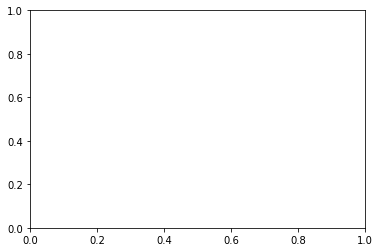

In [12]:
x = [data[i][0] for i in range(0, 50)]
y = [data[j][1] for j in range(0, 50)]
fig, ax = plt.subplots()

ax.scatter(x, y, color=colors[cluster_assignments])
ax.set_ylim(-1, 5)
ax.set_yticklabels(['0', 'top_1', 'top_2',
               'top_3', 'top_4',
               'top_5'])
ax.set_title("Spectral Clustering")


/opt/anaconda/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


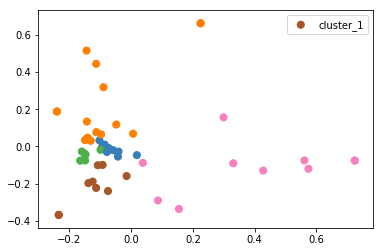

In [29]:
fig1, ax1 = plt.subplots()
ax1.scatter(data2D[:,0], data2D[:,1], s=50, color=colors[cluster_assignments])

In [ ]:
spectral.fit_predict??

In [ ]:
entity_text = " ".join(tokens[i].decode() for i in range_array)

In [ ]:
tokens[i]

In [ ]:
score_text